# Acoustic Scene Classification


**IMPORTING LIBRARIES**

In [1]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import librosa.display

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

In [19]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


**MELSPECTOGRAM CREATION**

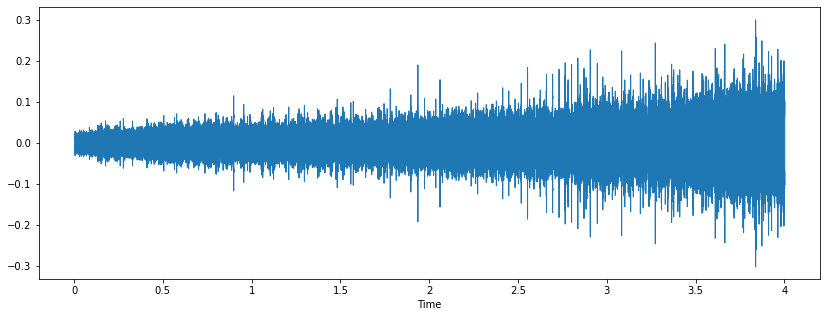

In [68]:
from matplotlib import pyplot as plt
input='UrbanSound8K/drill.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(input)
librosa.display.waveshow(data,sr=sample_rate)#waveplotting, monochannel-22050
ipd.Audio(input)

In [69]:
sample_rate

22050

In [5]:
path = 'UrbanSound8K/audio'
df = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


MORE PREPROCESSING

In [6]:
sample = r"UrbanSound8K/dog.wav" # single bark
x,freq = librosa.load(sample)
sr=freq

In [7]:
print(x.shape)
print(type(x))
print(freq)
print(type(freq))

(20727,)
<class 'numpy.ndarray'>
22050
<class 'int'>


In [8]:
import IPython.display as ipd
ipd.Audio(sample)

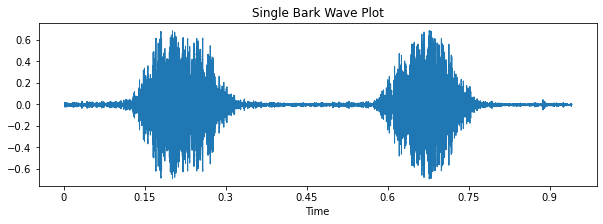

In [9]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10,3))
plt.title("Single Bark Wave Plot")
librosa.display.waveshow(x,sr=freq)

shape of mfcc: (20, 16)


<ipython-input-19-4f847229e99a>:1: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11654448 -0.17198665
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc=librosa.feature.mfcc(x,sr=sr)


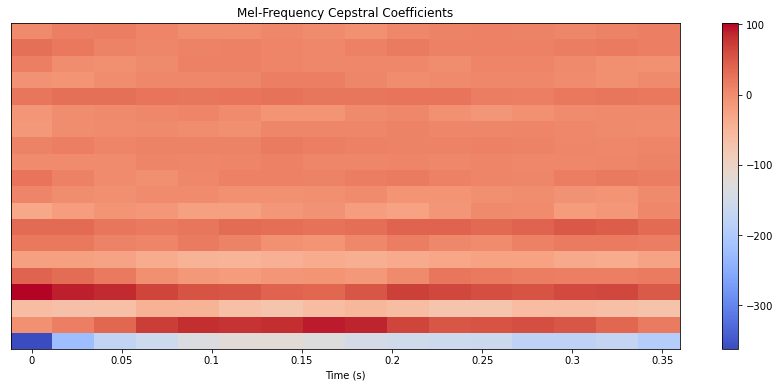

In [19]:
mfcc=librosa.feature.mfcc(x,sr=sr)
print("shape of mfcc:" ,mfcc.shape)


plt.figure(figsize=(15,6))
librosa.display.specshow(mfcc,x_axis="s")
plt.title("Mel-Frequency Cepstral Coefficients")
plt.colorbar()

In [23]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [24]:
metadata['class'].value_counts()

jackhammer          1000
street_music        1000
dog_bark            1000
engine_idling       1000
children_playing    1000
air_conditioner     1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [70]:
import librosa
audio_file_path='UrbanSound8K/drill.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

**MFCC FEATURE EXTRACTION**
1) We utilised the Librosa library for preprocessing audio files, and to do so, we will go through each fold and extract the data from each file using Librosa's mfcc function. 

2) Some of the MelFrequency Cepstral Coefficients found for three of the audio classes are shown in the figures below. The mel-frequency cepstrum is a representation of a sound's short-term power spectrum in sound processing. 

3) We used librosa to create log spectrograms from audio files. We began by importing the.csv (comma separated) file containing all of the audio file names and labels. 

4) We built a function that reads the file location and iterates over each row of the data frame to extract the features. Windowing the signal, performing the DFT (Discrete Fourier Transform), obtaining the log of the magnitude, and then warping the frequencies on a Mel scale are all part of the MFCC feature extraction approach (Discrete Cosine Transform).

In [26]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
print(librosa_audio_data)

(40, 173)
[-0.00014516  0.00312581  0.00077667 ...  0.00803299 -0.01766744
 -0.02602624]


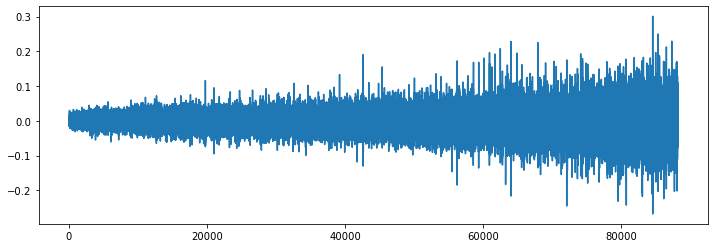

In [27]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [28]:
mfccs

array([[-308.76556   , -269.79086   , -255.59415   , ..., -117.601555  ,
        -116.556496  , -126.04208   ],
       [  10.066563  ,    5.065811  ,   18.822916  , ...,    9.11206   ,
           7.394821  ,   11.829771  ],
       [ -24.277412  ,  -24.262344  ,  -22.305996  , ...,  -44.057205  ,
         -44.006252  ,  -39.693092  ],
       ...,
       [   6.8039207 ,    7.1302094 ,    2.8211646 , ...,    2.715272  ,
           4.2997603 ,    9.615266  ],
       [ -10.169826  ,   -8.106381  ,   -6.650155  , ...,   -2.4436827 ,
          -1.6762706 ,    4.8015356 ],
       [  -4.663641  ,   -1.1086247 ,    0.45500934, ...,    4.2892265 ,
           5.4827347 ,    5.728019  ]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

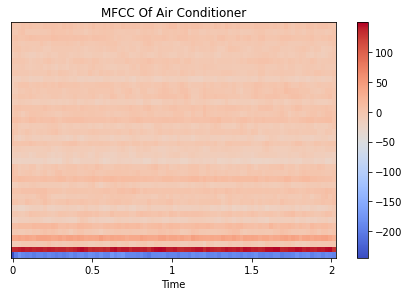

In [29]:
from matplotlib import pyplot as plt
audio_path = "UrbanSound8K/audio/fold1/127873-0-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Air Conditioner")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

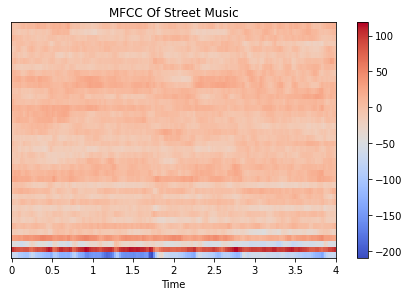

In [30]:
audio_path = "UrbanSound8K/audio/fold1/108041-9-0-11.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Street Music")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

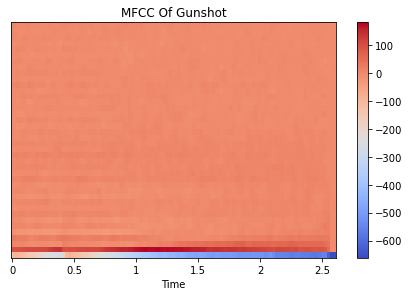

In [64]:
audio_path = "UrbanSound8K/audio/fold1/102305-6-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Gunshot")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

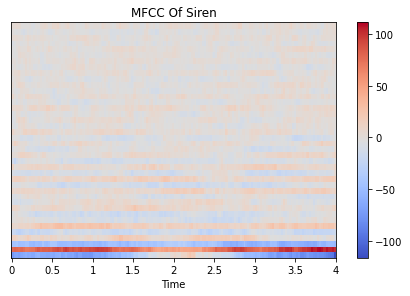

In [65]:
audio_path = "UrbanSound8K/audio/fold1/106905-8-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Siren")
plt.show

In [31]:
def features_extract(file):
    audio,sample_rate = librosa.load(file_name,res_type='kaiser_fast')
    feature = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=50)
    scaled_feature = np.mean(feature.T,axis=0)
    return scaled_feature

extracted = []

for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(path),'fold'+str(row["fold"])+'/',str(row['slice_file_name'])) 
    final_class_labels = row['class']   
    data= features_extract(file_name)    
    extracted.append([data,final_class_labels])

3555it [03:47, 18.82it/s]C:\Users\hp\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [08:09, 24.10it/s]C:\Users\hp\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [08:35, 16.95it/s]


In [32]:
ext_df = pd.DataFrame(extracted,columns=['feature','class'])
ext_df

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing
...,...,...
8727,"[-399.52393, 136.84413, -51.977036, 37.014854,...",car_horn
8728,"[-347.32773, 87.53586, -46.2994, 52.748062, -3...",car_horn
8729,"[-304.84702, 112.69567, -47.21992, 37.061134, ...",car_horn
8730,"[-345.06885, 126.78658, -56.18254, 36.07703, -...",car_horn


In [45]:
x = np.array(ext_df['feature'].tolist())
y = np.array(ext_df['class'].tolist())

In [72]:
x.shape

(8732, 50)

In [46]:
le = LabelEncoder()

y = to_categorical(le.fit_transform(y))

# CNN MODEL
For 15 epochs, The Convolutional Neural Network obtains an accuracy of 94%.

In [47]:
xTrainval, xTest, yTrainval, yTest = train_test_split(
    x, y, test_size=0.1, stratify=y, random_state=387
)
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=387
)
print("\nNumber of samples for Train set :", xTrain.shape[0])
print("Number of samples for Validation set :", xvalid.shape[0])
print("Number of samples for Test set :", xTest.shape[0])

xTrain = np.expand_dims(xTrain, axis=2)
xvalid = np.expand_dims(xvalid, axis=2)

print("Shape of X Train", xTrain.shape)
print("Shape of X Test", xTest.shape)


Number of samples for Train set : 6286
Number of samples for Validation set : 1572
Number of samples for Test set : 874
Shape of X Train (6286, 50, 1)
Shape of X Test (874, 50)


In [48]:
xtrain = xTrain.reshape(xTrain.shape[0], 10 ,5,1)
xtest = xTest.reshape(xTest.shape[0], 10, 5, 1)

print("The Shape of X Train", xtrain.shape)
print("The Shape of Y Train", yTrain.shape)
print("The Shape of X Test", xtest.shape)
print("The Shape of Y Test", yTest.shape)

The Shape of X Train (6286, 10, 5, 1)
The Shape of Y Train (6286, 10)
The Shape of X Test (874, 10, 5, 1)
The Shape of Y Test (874, 10)


In [77]:
CNN2D_Model = Sequential()
CNN2D_Model.add(
    Conv2D(64, (3, 3), padding="same", activation="ReLU", input_shape=(10,5,1))
)
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Conv2D(128, (3, 3), padding="same", activation="LeakyReLU"))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.2))
CNN2D_Model.add(Flatten())
CNN2D_Model.add(Dense(1024, activation="ReLU"))
CNN2D_Model.add(Dense(10, activation="softmax"))
CNN2D_Model.summary()
#model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
CNN2D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)
CNN2D_Results = CNN2D_Model.fit(
    xtrain, yTrain, epochs=10, batch_size=50, validation_data=(xtest, yTest)
)
CNN2D_Model.save('cnnmodel.h5')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 10, 5, 64)         640       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 2, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 5, 2, 128)         73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 2, 1, 128)        0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 2, 1, 128)         0         
                                                                 
 flatten_10 (Flatten)        (None, 256)             

# ANN MODEL
Out of 8732 audio files, there are 6985 training samples and 1747 testing samples. For 150 epochs and a batch size of 32, accuracy of 76% is obtained for Artificial Neural Network Model.


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print("Number of training samples = ", x_train.shape[0])
print("Number of testing samples = ",x_test.shape[0])

Number of training samples =  6985
Number of testing samples =  1747


In [58]:
x_train.shape

(6985, 50)

In [59]:
y_train.shape

(6985, 10)

In [60]:
x_test.shape

(1747, 50)

In [61]:
y_test.shape

(1747, 10)

In [55]:
num_labels = y.shape[1]
model = Sequential()

model.add(Dense(128, input_shape=(50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               6528      
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 256)              

In [56]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [57]:
num_epochs = 150
num_batch_size = 32

history=model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
         )

Epoch 1/150
219/219 [==============================] - 1s 3ms/step - loss: 9.7815 - accuracy: 0.1512 - val_loss: 2.1732 - val_accuracy: 0.2026
Epoch 2/150
219/219 [==============================] - 1s 3ms/step - loss: 2.3661 - accuracy: 0.2146 - val_loss: 2.1097 - val_accuracy: 0.1929
Epoch 3/150
219/219 [==============================] - 1s 3ms/step - loss: 2.0902 - accuracy: 0.2535 - val_loss: 1.9747 - val_accuracy: 0.2553
Epoch 4/150
219/219 [==============================] - 1s 3ms/step - loss: 1.9645 - accuracy: 0.2955 - val_loss: 1.8001 - val_accuracy: 0.3537
Epoch 5/150
219/219 [==============================] - 1s 3ms/step - loss: 1.8697 - accuracy: 0.3377 - val_loss: 1.6935 - val_accuracy: 0.4516
Epoch 6/150
219/219 [==============================] - 1s 3ms/step - loss: 1.7611 - accuracy: 0.3814 - val_loss: 1.5961 - val_accuracy: 0.4408
Epoch 7/150
219/219 [==============================] - 1s 3ms/step - loss: 1.7117 - accuracy: 0.4042 - val_loss: 1.5381 - val_accuracy: 0.5060

Epoch 58/150
219/219 [==============================] - 1s 3ms/step - loss: 0.8461 - accuracy: 0.7200 - val_loss: 0.6373 - val_accuracy: 0.8128
Epoch 59/150
219/219 [==============================] - 1s 3ms/step - loss: 0.8399 - accuracy: 0.7231 - val_loss: 0.6332 - val_accuracy: 0.8134
Epoch 60/150
219/219 [==============================] - 1s 3ms/step - loss: 0.8360 - accuracy: 0.7251 - val_loss: 0.6038 - val_accuracy: 0.8174
Epoch 61/150
219/219 [==============================] - 1s 3ms/step - loss: 0.8425 - accuracy: 0.7228 - val_loss: 0.6293 - val_accuracy: 0.8163
Epoch 62/150
219/219 [==============================] - 1s 3ms/step - loss: 0.8270 - accuracy: 0.7237 - val_loss: 0.6267 - val_accuracy: 0.8180
Epoch 63/150
219/219 [==============================] - 1s 3ms/step - loss: 0.8340 - accuracy: 0.7303 - val_loss: 0.6185 - val_accuracy: 0.8197
Epoch 64/150
219/219 [==============================] - 1s 3ms/step - loss: 0.8267 - accuracy: 0.7304 - val_loss: 0.6407 - val_accuracy:

Epoch 115/150
219/219 [==============================] - 1s 3ms/step - loss: 0.7123 - accuracy: 0.7738 - val_loss: 0.5622 - val_accuracy: 0.8340
Epoch 116/150
219/219 [==============================] - 1s 3ms/step - loss: 0.7324 - accuracy: 0.7635 - val_loss: 0.5346 - val_accuracy: 0.8443
Epoch 117/150
219/219 [==============================] - 1s 3ms/step - loss: 0.7367 - accuracy: 0.7638 - val_loss: 0.5152 - val_accuracy: 0.8500
Epoch 118/150
219/219 [==============================] - 1s 3ms/step - loss: 0.7242 - accuracy: 0.7658 - val_loss: 0.4969 - val_accuracy: 0.8477
Epoch 119/150
219/219 [==============================] - 1s 3ms/step - loss: 0.7435 - accuracy: 0.7572 - val_loss: 0.5328 - val_accuracy: 0.8483
Epoch 120/150
219/219 [==============================] - 1s 3ms/step - loss: 0.6960 - accuracy: 0.7729 - val_loss: 0.5208 - val_accuracy: 0.8420
Epoch 121/150
219/219 [==============================] - 1s 3ms/step - loss: 0.7230 - accuracy: 0.7678 - val_loss: 0.5400 - val_ac

# Model Accuracy for ANN

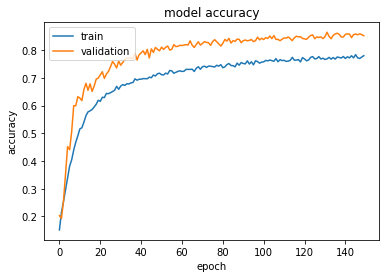

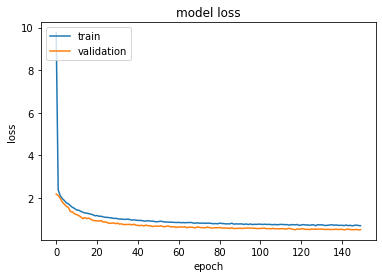

In [62]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# Predicting Output

In [ ]:
def extract_feature(file_name):
    audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    fea = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=50)
    scaled = np.mean(fea.T,axis=0)
    return np.array([scaled])

In [56]:
def print_prediction(file_name):
    pred_fea = extract_feature(file_name) 
    pred_vector = np.argmax(model.predict(pred_fea), axis=-1)
    pred_class = le.inverse_transform(pred_vector)
    print("The predicted class is:", pred_class[0], '\n')

In [57]:
file_name = 'UrbanSound8K/drill.wav'

print_prediction(file_name)

ipd.Audio(file_name)

1/1 [==============================] - 0s 185ms/step
The predicted class is: drilling 



In [44]:
classes_code = {v:k for k,v in zip(classes["class"], classes["classID"])}
# A dictionnary doesn't accept double values
print(classes_code)

{3: 'dog_bark', 2: 'children_playing', 1: 'car_horn', 0: 'air_conditioner', 9: 'street_music', 6: 'gun_shot', 8: 'siren', 5: 'engine_idling', 7: 'jackhammer', 4: 'drilling'}
